In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r"C:\Users\dell1\Downloads\train_ctrUa4K.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train.shape

(614, 13)

In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#we can remove Loan_ID

In [8]:
train = train.drop("Loan_ID",axis=1)

In [9]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
train["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
train.describe(include='object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [12]:
gender_counts=train.Gender.value_counts()
gender_counts

Male      489
Female    112
Name: Gender, dtype: int64

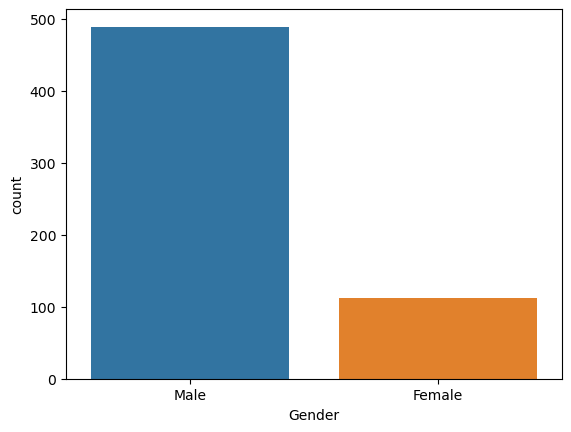

In [13]:
sns.countplot(x='Gender',data=train)
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
train["Loan_Status"]=le.fit_transform(train["Loan_Status"])

In [17]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [18]:
loanstatus_counts=train.Loan_Status.value_counts()
loanstatus_counts

1    422
0    192
Name: Loan_Status, dtype: int64

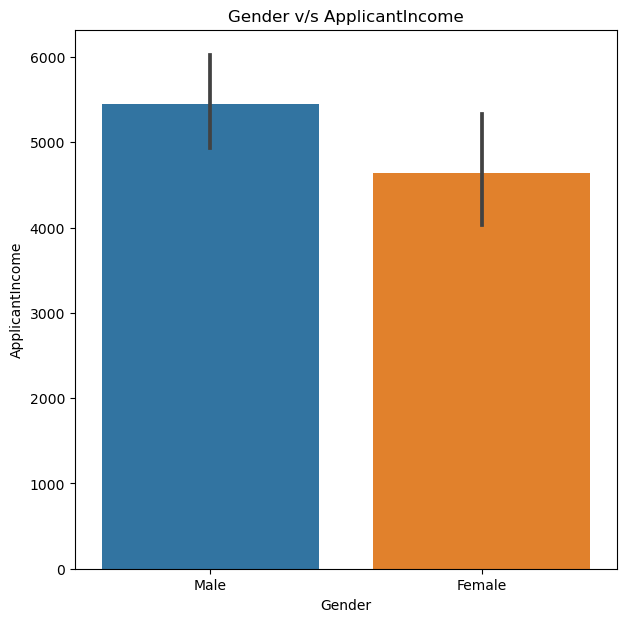

In [19]:
plt.figure(figsize=(7,7))
plt.title('Gender v/s ApplicantIncome')
sns.barplot(x='Gender',y='ApplicantIncome',data=train)
plt.show()


In [20]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

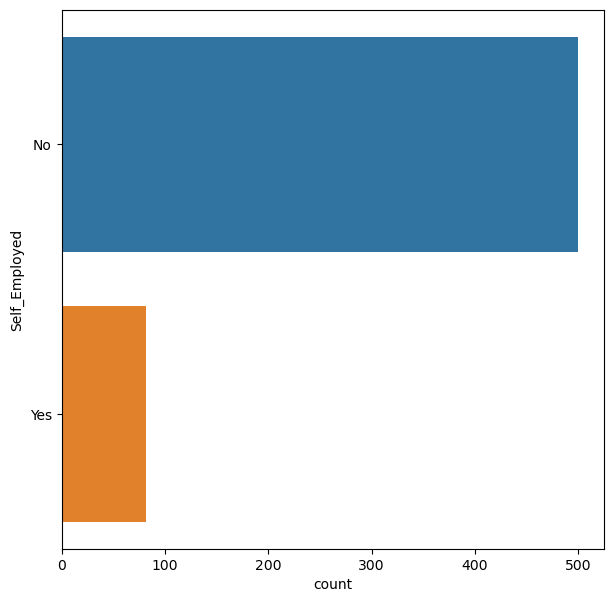

In [21]:
plt.figure(figsize=(7,7))
sns.countplot(y='Self_Employed',data=train)
plt.show()

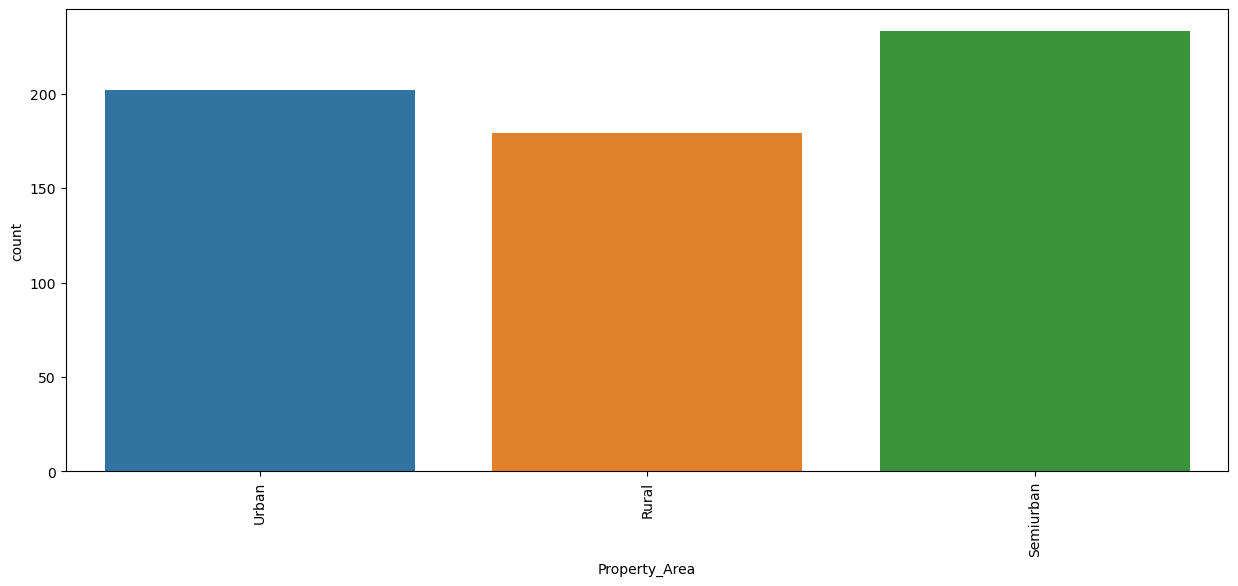

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(x='Property_Area',data=train)
plt.xticks(rotation=90)
plt.show()

In [23]:
train.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

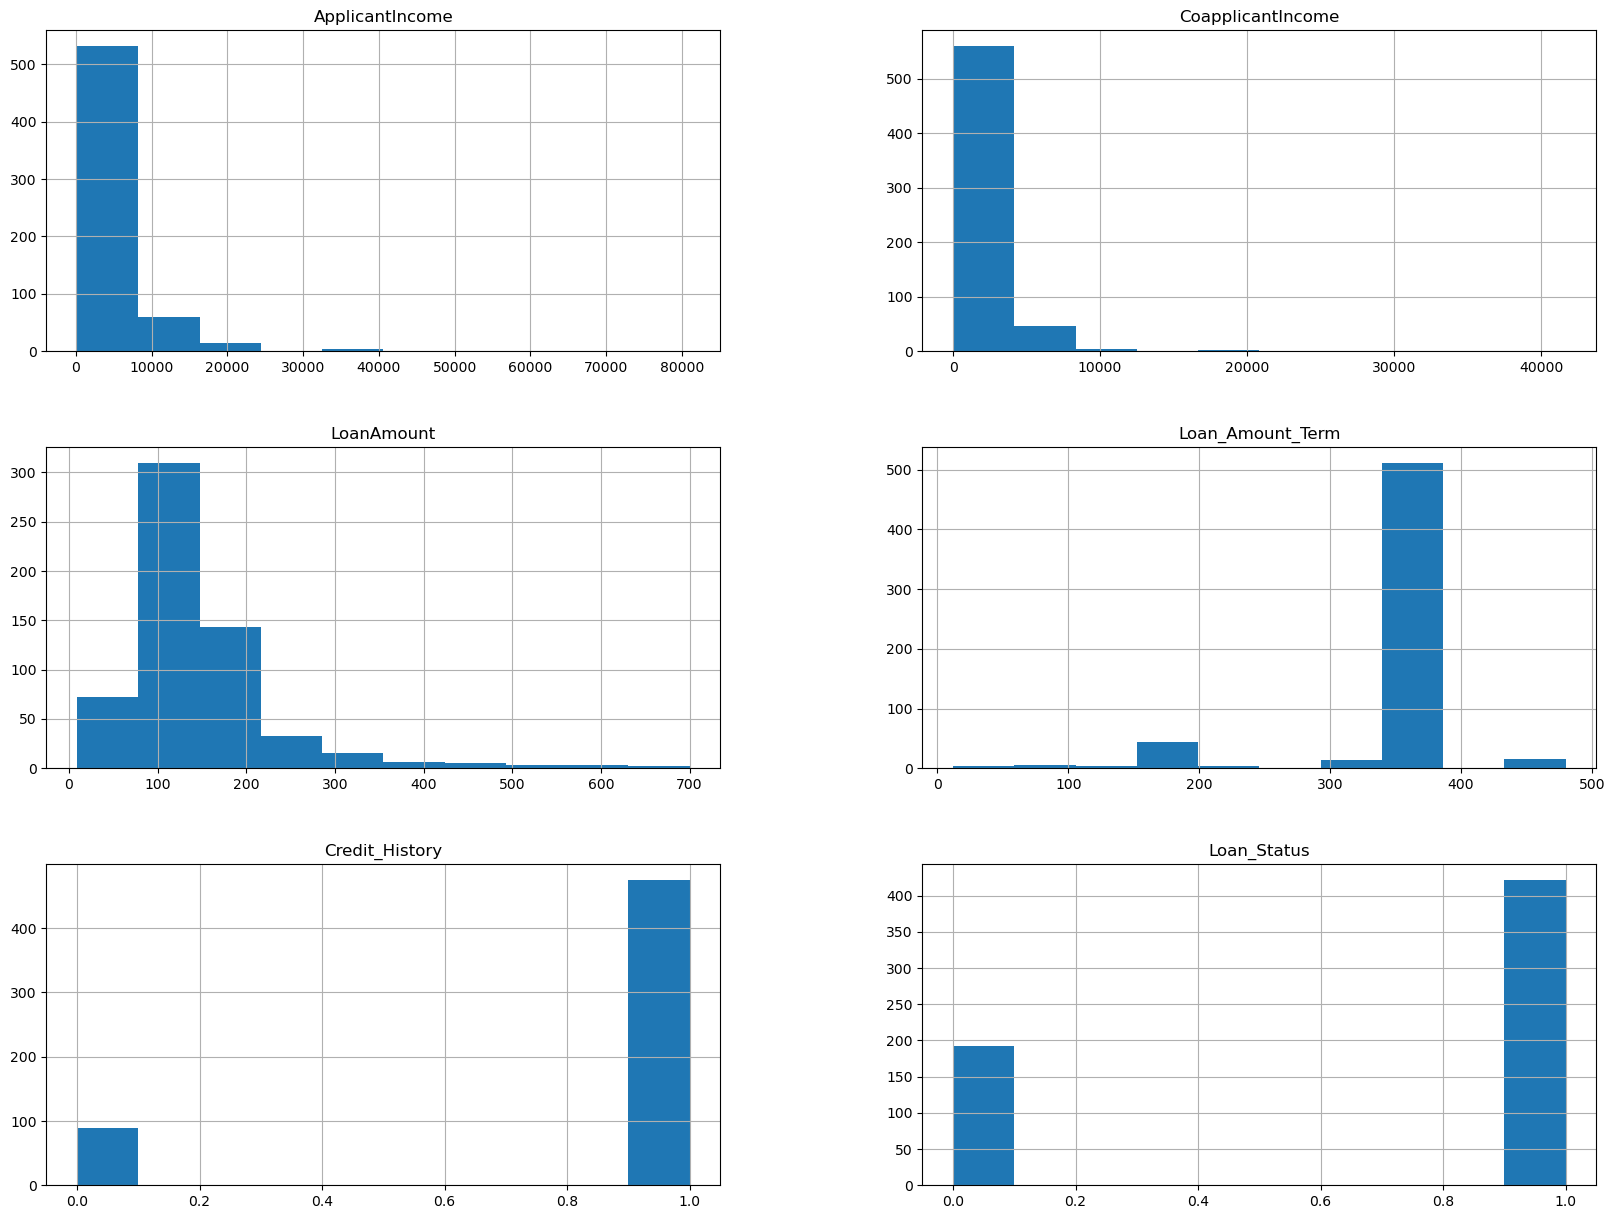

In [25]:
fregraph = train.select_dtypes(include=["float","int64","int32"])
fregraph.hist(figsize=(20,15))
plt.show()

In [26]:
for col in['Gender','Married','Dependents', 'Self_Employed']:
    train[col]=train[col].fillna(train[col].mode()[0])

In [27]:
for col in['LoanAmount','Loan_Amount_Term', 'Credit_History']:
    train[col]=train[col].fillna(train[col].median())

In [28]:
train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
#Outlier Handling

In [30]:
num_col= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']

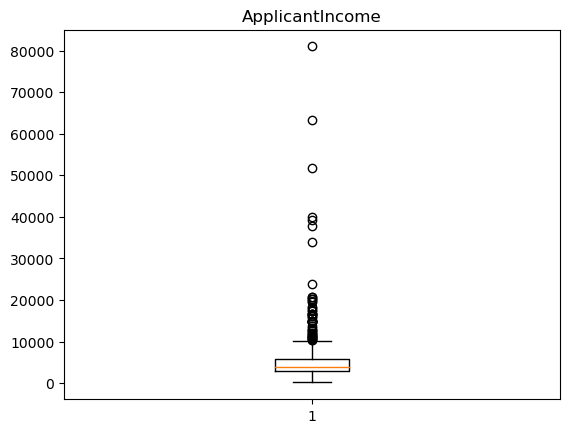

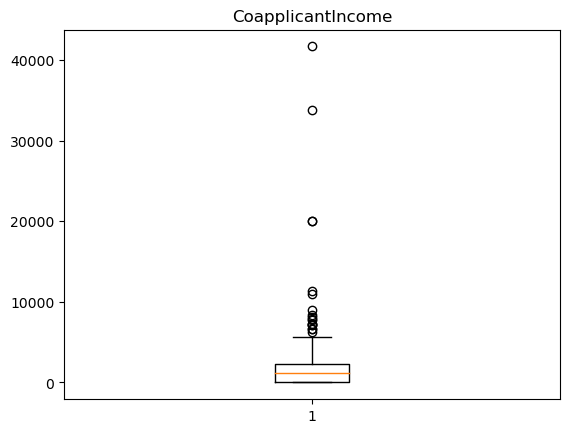

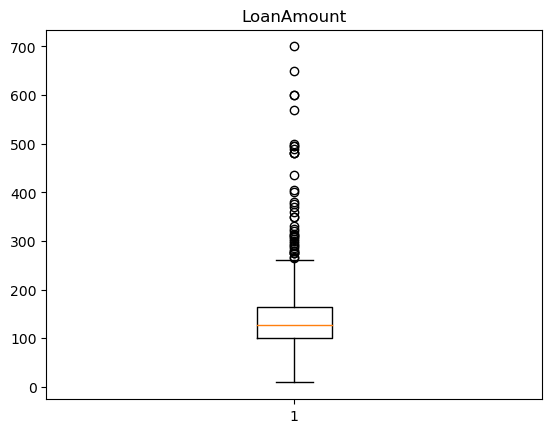

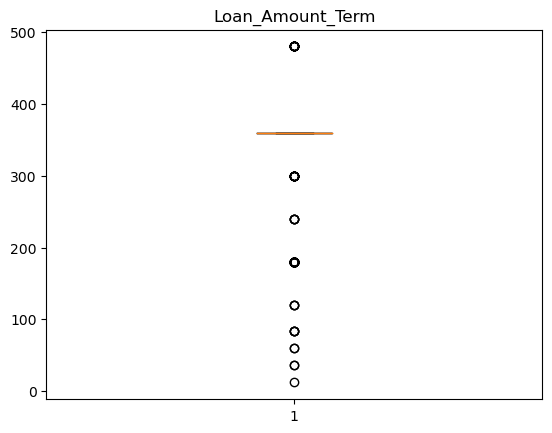

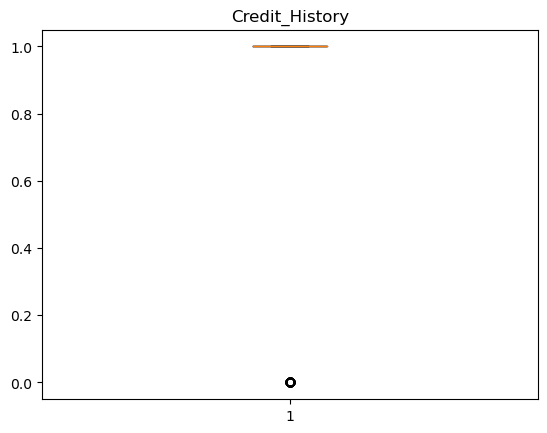

In [31]:
for i in num_col:
    plt.figure()
    plt.boxplot(train[i])
    plt.title(i)

In [32]:
Q1 = np.percentile(train['ApplicantIncome'],25,method="midpoint")
Q2 = np.percentile(train['ApplicantIncome'],50,method="midpoint")
Q3 = np.percentile(train['ApplicantIncome'],75,method="midpoint")

In [33]:
IQR= Q3-Q1
upp_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR
print(upp_lim)
print(low_lim)

10156.5
-1487.5


In [34]:
outliers=[]
for x in train["ApplicantIncome"]:
    if(x>upp_lim) or (x<low_lim):
        outliers.append(x)

In [35]:
outliers

[12841,
 12500,
 11500,
 10750,
 13650,
 11417,
 14583,
 10408,
 23803,
 10513,
 20166,
 14999,
 11757,
 14866,
 39999,
 51763,
 33846,
 39147,
 12000,
 11000,
 16250,
 14683,
 11146,
 14583,
 20667,
 20233,
 15000,
 63337,
 19730,
 15759,
 81000,
 14880,
 12876,
 10416,
 37719,
 16692,
 16525,
 16667,
 10833,
 18333,
 17263,
 20833,
 13262,
 17500,
 11250,
 18165,
 19484,
 16666,
 16120,
 12000]

In [36]:
train["ApplicantIncome"]=np.where(train["ApplicantIncome"]>upp_lim,upp_lim,np.where(train["ApplicantIncome"]<low_lim,low_lim,train["ApplicantIncome"]))

In [37]:
Q1 = np.percentile(train['CoapplicantIncome'],25,method="midpoint")
Q2 = np.percentile(train['CoapplicantIncome'],50,method="midpoint")
Q3 = np.percentile(train['CoapplicantIncome'],75,method="midpoint")

In [38]:
IQR= Q3-Q1
upp_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR
print(upp_lim)
print(low_lim)

5731.25
-3438.75


In [39]:
outliers=[]
for x in train["CoapplicantIncome"]:
    if(x>upp_lim) or (x<low_lim):
        outliers.append(x)

In [40]:
outliers

[10968.0,
 8106.0,
 7210.0,
 8980.0,
 7750.0,
 11300.0,
 7250.0,
 7101.0,
 6250.0,
 7873.0,
 20000.0,
 20000.0,
 8333.0,
 6667.0,
 6666.0,
 7166.0,
 33837.0,
 41667.0]

In [41]:
train["CoapplicantIncome"]=np.where(train["CoapplicantIncome"]>upp_lim,upp_lim,np.where(train["CoapplicantIncome"]<low_lim,low_lim,train["CoapplicantIncome"]))

In [42]:
Q1 = np.percentile(train['LoanAmount'],25,method="midpoint")
Q2 = np.percentile(train['LoanAmount'],50,method="midpoint")
Q3 = np.percentile(train['LoanAmount'],75,method="midpoint")

In [43]:
IQR= Q3-Q1
upp_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR
print(upp_lim)
print(low_lim)

260.5
4.5


In [44]:
outliers=[]
for x in train["LoanAmount"]:
    if(x>upp_lim) or (x<low_lim):
        outliers.append(x)

In [45]:
outliers

[267.0,
 349.0,
 315.0,
 320.0,
 286.0,
 312.0,
 265.0,
 370.0,
 650.0,
 290.0,
 600.0,
 275.0,
 700.0,
 495.0,
 280.0,
 279.0,
 304.0,
 330.0,
 436.0,
 480.0,
 300.0,
 376.0,
 490.0,
 308.0,
 570.0,
 380.0,
 296.0,
 275.0,
 360.0,
 405.0,
 500.0,
 480.0,
 311.0,
 480.0,
 400.0,
 324.0,
 600.0,
 275.0,
 292.0,
 350.0,
 496.0]

In [46]:
train["LoanAmount"]=np.where(train["LoanAmount"]>upp_lim,upp_lim,np.where(train["LoanAmount"]<low_lim,low_lim,train["LoanAmount"]))

In [47]:
Q1 = np.percentile(train['Loan_Amount_Term'],25,method="midpoint")
Q2 = np.percentile(train['Loan_Amount_Term'],50,method="midpoint")
Q3 = np.percentile(train['Loan_Amount_Term'],75,method="midpoint")

In [48]:
IQR= Q3-Q1
upp_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR
print(upp_lim)
print(low_lim)

360.0
360.0


In [49]:
# Here IQR =0

In [50]:
outliers=[]
for x in train["Loan_Amount_Term"]:
    if(x>upp_lim) or (x<low_lim):
        outliers.append(x)

In [51]:
train["Loan_Amount_Term"]=np.where(train["Loan_Amount_Term"]>upp_lim,upp_lim,np.where(train["Loan_Amount_Term"]<low_lim,low_lim,train["Loan_Amount_Term"]))

In [52]:
Q1 = np.percentile(train['Credit_History'],25,method="midpoint")
Q2 = np.percentile(train['Credit_History'],50,method="midpoint")
Q3 = np.percentile(train['Credit_History'],75,method="midpoint")

In [53]:
IQR= Q3-Q1
upp_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR
print(upp_lim)
print(low_lim)

1.0
1.0


In [54]:
outliers=[]
for x in train["Credit_History"]:
    if(x>upp_lim) or (x<low_lim):
        outliers.append(x)

In [55]:
outliers

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [56]:
train["Credit_History"]=np.where(train["Loan_Amount_Term"]>upp_lim,upp_lim,np.where(train["Credit_History"]<low_lim,low_lim,train["Credit_History"]))

In [57]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,1


In [58]:
train["Gender"]=le.fit_transform(train["Gender"])

In [59]:
train["Married"]=le.fit_transform(train["Married"])

In [60]:
train["Education"]=le.fit_transform(train["Education"])

In [61]:
train["Property_Area"]=le.fit_transform(train["Property_Area"])

In [62]:
train["Dependents"]=le.fit_transform(train["Dependents"])

In [63]:
train["Self_Employed"]=le.fit_transform(train["Self_Employed"])

In [64]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [65]:
test=pd.read_csv(r"C:\Users\dell1\Downloads\test_lAUu6dG.csv")

In [66]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [67]:
test= test.drop("Loan_ID",axis=1)

In [68]:
test.shape

(367, 11)

In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [70]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [71]:
test.describe(include="object")

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,356,367,357,367,344,367
unique,2,2,4,2,2,3
top,Male,Yes,0,Graduate,No,Urban
freq,286,233,200,283,307,140


In [72]:
test["Gender"]=le.fit_transform(test["Gender"])

In [73]:
test["Married"]=le.fit_transform(test["Married"])

In [74]:
test["Education"]=le.fit_transform(test["Education"])

In [75]:
test["Property_Area"]=le.fit_transform(test["Property_Area"])

In [76]:
test["Dependents"]=le.fit_transform(test["Dependents"])

In [77]:
test["Self_Employed"]=le.fit_transform(test["Self_Employed"])

In [78]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,NaN,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [79]:
test.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [80]:
for col in['Dependents', 'Self_Employed']:
    test[col]=test[col].fillna(test[col].mode()[0])

In [81]:
for col in['LoanAmount','Loan_Amount_Term', 'Credit_History']:
    test[col]=test[col].fillna(test[col].median())

In [82]:
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [83]:
num_col= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']

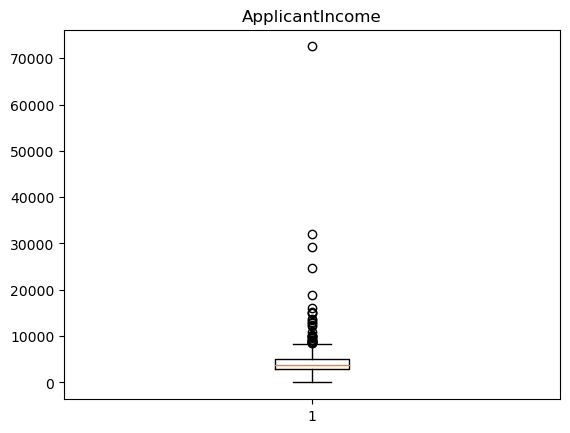

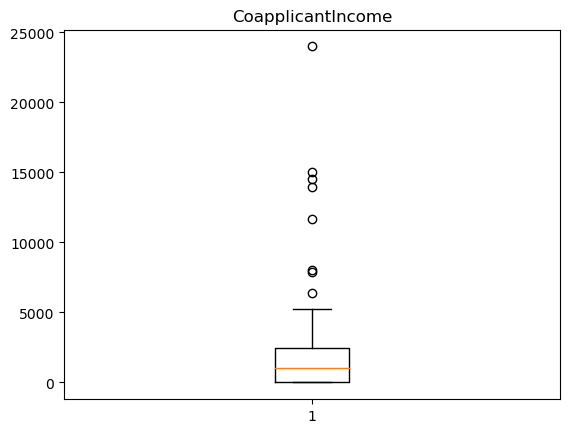

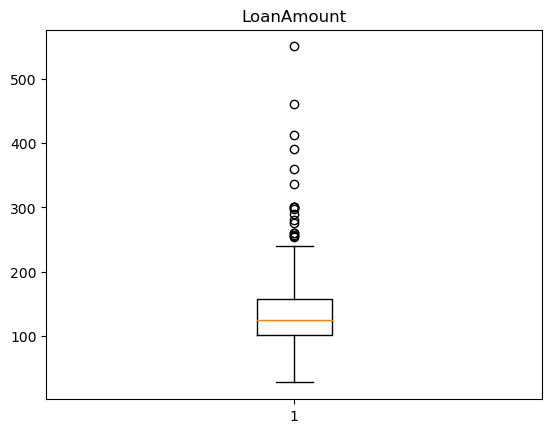

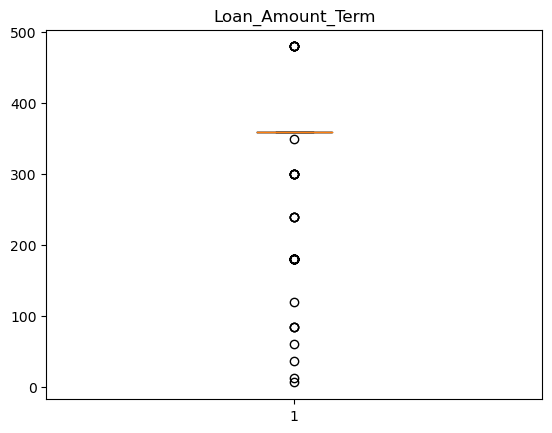

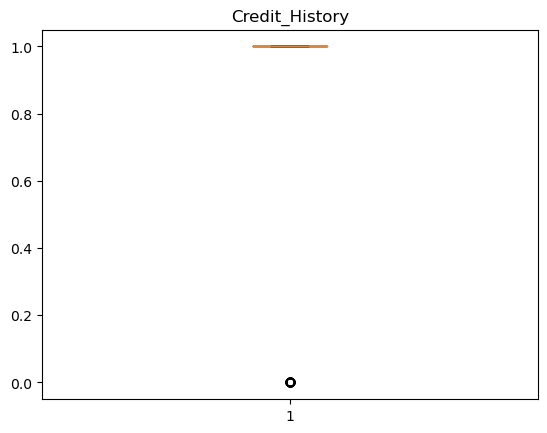

In [84]:
for i in num_col:
    plt.figure()
    plt.boxplot(test[i])
    plt.title(i)

In [85]:
Q1 = np.percentile(test['ApplicantIncome'],25,method="midpoint")
Q2 = np.percentile(test['ApplicantIncome'],50,method="midpoint")
Q3 = np.percentile(test['ApplicantIncome'],75,method="midpoint")

In [86]:
IQR= Q3-Q1
upp_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR
print(upp_lim)
print(low_lim)

8354.0
-430.0


In [87]:
outliers=[]
for x in test["ApplicantIncome"]:
    if(x>upp_lim) or (x<low_lim):
        outliers.append(x)

In [88]:
test["ApplicantIncome"]=np.where(test["ApplicantIncome"]>upp_lim,upp_lim,np.where(test["ApplicantIncome"]<low_lim,low_lim,test["ApplicantIncome"]))

In [89]:
Q1 = np.percentile(test['CoapplicantIncome'],25,method="midpoint")
Q2 = np.percentile(test['CoapplicantIncome'],50,method="midpoint")
Q3 = np.percentile(test['CoapplicantIncome'],75,method="midpoint")
IQR= Q3-Q1
upp_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR
print(upp_lim)
print(low_lim)

6076.25
-3645.75


In [90]:
outliers=[]
for x in test["CoapplicantIncome"]:
    if(x>upp_lim) or (x<low_lim):
        outliers.append(x)

In [91]:
test["CoapplicantIncome"]=np.where(test["CoapplicantIncome"]>upp_lim,upp_lim,np.where(test["CoapplicantIncome"]<low_lim,low_lim,test["CoapplicantIncome"]))

In [92]:
Q1 = np.percentile(test['LoanAmount'],25,method="midpoint")
Q2 = np.percentile(test['LoanAmount'],50,method="midpoint")
Q3 = np.percentile(test['LoanAmount'],75,method="midpoint")

In [93]:
IQR= Q3-Q1
upp_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR
print(upp_lim)
print(low_lim)

242.25
16.25


In [94]:
outliers=[]
for x in test["LoanAmount"]:
    if(x>upp_lim) or (x<low_lim):
        outliers.append(x)

In [95]:
outliers

[280.0,
 300.0,
 290.0,
 275.0,
 360.0,
 257.0,
 390.0,
 256.0,
 300.0,
 550.0,
 260.0,
 336.0,
 412.0,
 460.0,
 297.0,
 300.0,
 260.0,
 254.0]

In [96]:
test["LoanAmount"]=np.where(test["LoanAmount"]>upp_lim,upp_lim,np.where(test["LoanAmount"]<low_lim,low_lim,test["LoanAmount"]))

In [97]:
Q1 = np.percentile(test['Loan_Amount_Term'],25,method="midpoint")
Q2 = np.percentile(test['Loan_Amount_Term'],50,method="midpoint")
Q3 = np.percentile(test['Loan_Amount_Term'],75,method="midpoint")

In [98]:
IQR= Q3-Q1
upp_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR
print(upp_lim)
print(low_lim)

360.0
360.0


In [99]:
outliers=[]
for x in test["Loan_Amount_Term"]:
    if(x>upp_lim) or (x<low_lim):
        outliers.append(x)

In [100]:
test["Loan_Amount_Term"]=np.where(test["Loan_Amount_Term"]>upp_lim,upp_lim,np.where(test["Loan_Amount_Term"]<low_lim,low_lim,test["Loan_Amount_Term"]))

In [101]:
Q1 = np.percentile(test['Credit_History'],25,method="midpoint")
Q2 = np.percentile(test['Credit_History'],50,method="midpoint")
Q3 = np.percentile(test['Credit_History'],75,method="midpoint")

In [102]:
IQR= Q3-Q1
upp_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR
print(upp_lim)
print(low_lim)

1.0
1.0


In [103]:
outliers=[]
for x in test["Credit_History"]:
    if(x>upp_lim) or (x<low_lim):
        outliers.append(x)

In [104]:
test["Credit_History"]=np.where(test["Loan_Amount_Term"]>upp_lim,upp_lim,np.where(test["Credit_History"]<low_lim,low_lim,test["Credit_History"]))

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
x=train.drop("Loan_Status",axis=1)

In [107]:
y = train["Loan_Status"]

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [109]:
#Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred_lr=logit_model.predict(x_test)

In [111]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [112]:
print("Accuracy=",accuracy_score(y_test,y_pred_lr))
print("Precision=",precision_score(y_test,y_pred_lr))
print("recall_score=",recall_score(y_test,y_pred_lr))
print("f1_score=",f1_score(y_test,y_pred_lr))

Accuracy= 0.6504065040650406
Precision= 0.6504065040650406
recall_score= 1.0
f1_score= 0.7881773399014779


In [113]:
confusion_matrix(y_test,y_pred_lr)

array([[ 0, 43],
       [ 0, 80]], dtype=int64)

In [114]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(2,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric="minkowski",p=2)
    classifier.fit(x_train,y_train)
    y_pred_knn=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

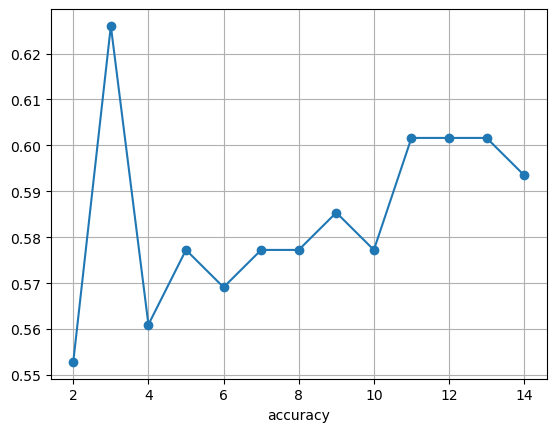

In [115]:
plt.plot(neighbors,metric,"o-")
plt.xlabel("kvalue")
plt.xlabel("accuracy")
plt.grid()

In [116]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)

In [117]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy=",accuracy_score(y_test,y_pred_knn))
print("Precision=",precision_score(y_test,y_pred_knn))
print("recall_score=",recall_score(y_test,y_pred_knn))
print("f1_score=",f1_score(y_test,y_pred_knn))

Accuracy= 0.6260162601626016
Precision= 0.6666666666666666
recall_score= 0.85
f1_score= 0.7472527472527473


In [118]:
confusion_matrix(y_test,y_pred_knn)

array([[ 9, 34],
       [12, 68]], dtype=int64)

In [119]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [120]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.5609756097560976


In [121]:
print(confusion_matrix(y_test,y_pred))

[[14 29]
 [25 55]]


In [122]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [123]:
y_pred=rf_clf.predict(x_test)

In [124]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.6178861788617886


In [125]:
print(confusion_matrix(y_test,y_pred))

[[ 4 39]
 [ 8 72]]


In [126]:
#We are getting smaller accuracy, so we are trying once again without capping outliers

In [127]:
train = pd.read_csv(r"C:\Users\dell1\Downloads\train_ctrUa4K.csv")

In [128]:
train = train.drop("Loan_ID",axis=1)

In [129]:
for col in['Gender','Married','Dependents', 'Self_Employed']:
    train[col]=train[col].fillna(train[col].mode()[0])

In [130]:
for col in['LoanAmount','Loan_Amount_Term', 'Credit_History']:
    train[col]=train[col].fillna(train[col].median())

In [131]:
train["Loan_Status"]=le.fit_transform(train["Loan_Status"])

In [132]:
train["Gender"]=le.fit_transform(train["Gender"])

In [133]:
train["Married"]=le.fit_transform(train["Married"])

In [134]:
train["Education"]=le.fit_transform(train["Education"])

In [135]:
train["Property_Area"]=le.fit_transform(train["Property_Area"])

In [136]:
train["Dependents"]=le.fit_transform(train["Dependents"])

In [137]:
train["Self_Employed"]=le.fit_transform(train["Self_Employed"])

In [138]:
test=pd.read_csv(r"C:\Users\dell1\Downloads\test_lAUu6dG.csv")

In [139]:
test = test.drop("Loan_ID",axis=1)

In [140]:
for col in['Dependents', 'Self_Employed']:
    test[col]=test[col].fillna(test[col].mode()[0])

In [141]:
for col in['LoanAmount','Loan_Amount_Term', 'Credit_History']:
    test[col]=test[col].fillna(test[col].median())

In [142]:
test["Gender"]=le.fit_transform(test["Gender"])

In [143]:
test["Self_Employed"]=le.fit_transform(test["Self_Employed"])

In [144]:
test["Property_Area"]=le.fit_transform(test["Property_Area"])

In [145]:
test["Dependents"]=le.fit_transform(test["Dependents"])

In [146]:
test["Education"]=le.fit_transform(test["Education"])

In [147]:
test["Married"]=le.fit_transform(test["Married"])

In [148]:
x=train.drop("Loan_Status",axis=1)
y=train["Loan_Status"]

In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [150]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred_lr=logit_model.predict(x_test)

In [151]:
print("Accuracy=",accuracy_score(y_test,y_pred_lr))
print("Precision=",precision_score(y_test,y_pred_lr))
print("recall_score=",recall_score(y_test,y_pred_lr))
print("f1_score=",f1_score(y_test,y_pred_lr))

Accuracy= 0.7886178861788617
Precision= 0.7596153846153846
recall_score= 0.9875
f1_score= 0.8586956521739131


In [152]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(2,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric="minkowski",p=2)
    classifier.fit(x_train,y_train)
    y_pred_knn=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

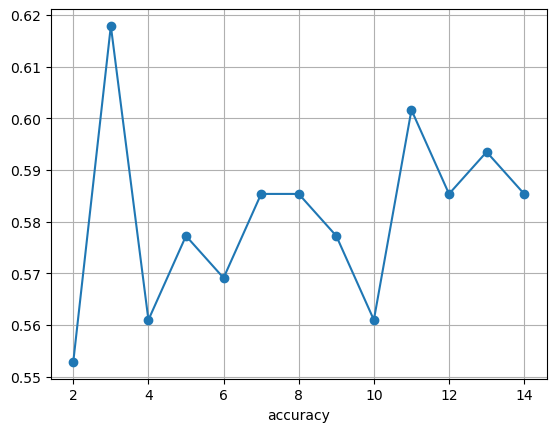

In [153]:
plt.plot(neighbors,metric,"o-")
plt.xlabel("kvalue")
plt.xlabel("accuracy")
plt.grid()

In [154]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)

In [155]:
print("Accuracy=",accuracy_score(y_test,y_pred_knn))
print("Precision=",precision_score(y_test,y_pred_knn))
print("recall_score=",recall_score(y_test,y_pred_knn))
print("f1_score=",f1_score(y_test,y_pred_knn))

Accuracy= 0.6178861788617886
Precision= 0.6633663366336634
recall_score= 0.8375
f1_score= 0.7403314917127072


In [156]:
confusion_matrix(y_test,y_pred_knn)

array([[ 9, 34],
       [13, 67]], dtype=int64)

In [157]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [158]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.6910569105691057


In [159]:
print(confusion_matrix(y_test,y_pred))

[[23 20]
 [18 62]]


In [160]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [161]:
y_pred=rf_clf.predict(x_test)

In [162]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.7804878048780488


In [163]:
print(confusion_matrix(y_test,y_pred))

[[18 25]
 [ 2 78]]


In [164]:
from sklearn.svm import SVC
svmclf=SVC(kernel="linear")
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [165]:
y_pred=svmclf.predict(x_test)

In [166]:
print("Accuracy=",accuracy_score(y_test,y_pred))
print("Precision=",precision_score(y_test,y_pred))
print("recall_score=",recall_score(y_test,y_pred))
print("f1_score=",f1_score(y_test,y_pred))

Accuracy= 0.7967479674796748
Precision= 0.7619047619047619
recall_score= 1.0
f1_score= 0.8648648648648648


In [167]:
print(confusion_matrix(y_test,y_pred))

[[18 25]
 [ 0 80]]


In [168]:
# We are getting the best models when we are not capping outliers and using SVM 

So we are using test data to predict the values in SVM 

In [169]:
y_pred=svmclf.predict(test)

In [170]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [171]:
#Since I am not familiar with tuning of SVM . I haven't done tuning here.

In [172]:
sample= pd.read_csv(r"C:\Users\dell1\Downloads\sample_submission_49d68Cx.csv")

In [173]:
y_pred= pd.DataFrame(y_pred,columns=["Loan_Status"])

In [174]:
sample.update(y_pred)

In [175]:
sample

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [177]:
sample["Loan_Status"]=sample["Loan_Status"].apply(lambda x:"N" if x=="0" else "Y")

In [178]:
sample.to_csv(r"C:\Users\dell1\Downloads\output.csv",index=False)